## EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [8]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
os.system("kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset")

Dataset URL: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
License(s): other



100%|██████████| 1.25M/1.25M [00:00<00:00, 1.05GB/s]


0

In [14]:
import zipfile

with zipfile.ZipFile("telco-customer-churn-ibm-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("telco-customer-churn-ibm-dataset")

print("Extracted files:", os.listdir("telco-customer-churn-ibm-dataset"))

Extracted files: ['Telco_customer_churn.xlsx']


In [23]:
import pandas as pd

# Load the Excel file (correct method)
churn = pd.read_excel("telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx")

# Show first 5 rows
print(churn.head(5))

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2860/3070735594.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


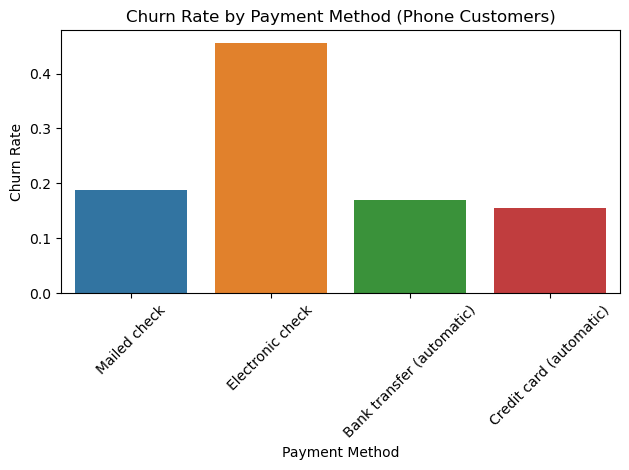

In [33]:
# Examine churn data, churn value
# payment type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for customers with phone service
df_phone = churn[churn['Phone Service'] == 'Yes']

# 2. Plot churn rate by payment method
sns.barplot(
    y='Churn Value',
    x='Payment Method',
    data=df_phone,
    ci=None
)

plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.title('Churn Rate by Payment Method (Phone Customers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2860/2387708248.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


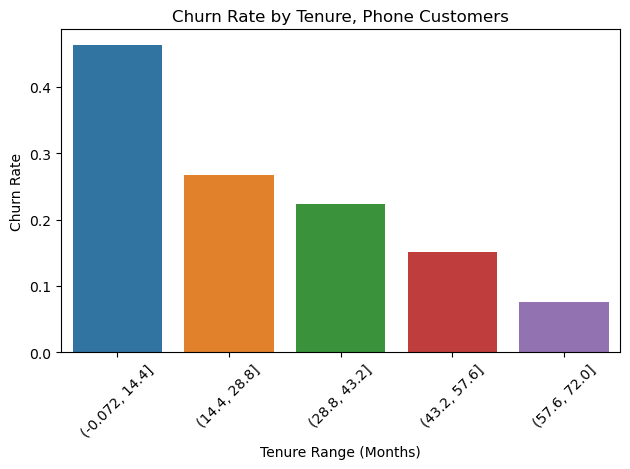

In [37]:
# Fix: column names based on your dataset
sns.barplot(
    y='Churn Value',
    x=pd.cut(df_phone['Tenure Months'], bins=5),  # bin tenure into 5 equal-width bins
    data=df_phone,
    ci=None
)

plt.ylabel('Churn Rate')
plt.xlabel('Tenure Range (Months)')
plt.title('Churn Rate by Tenure, Phone Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option

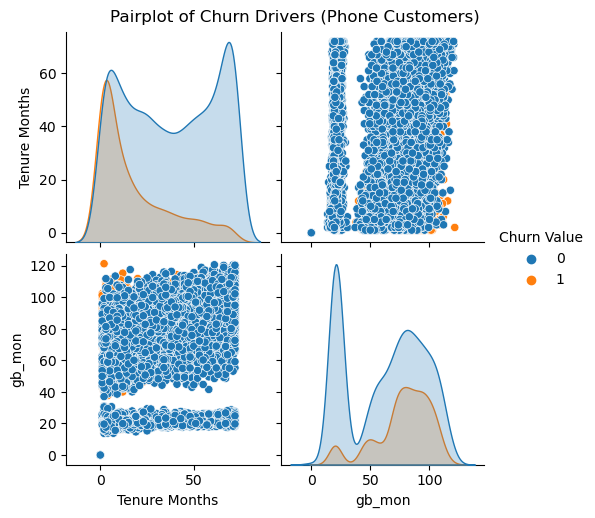

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for phone customers
df_phone = churn[churn['Phone Service'] == 'Yes'].copy()

# Step 2: Create 'gb_mon' — example: revenue per tenure month
# Avoid division by zero
df_phone['gb_mon'] = df_phone.apply(
    lambda row: row['Total Charges'] / row['Tenure Months'] if row['Tenure Months'] > 0 else 0,
    axis=1
)

# Step 3: Select variables for pairplot
pairplot = df_phone[['Tenure Months', 'Total Charges', 'gb_mon', 'Churn Value']]

# Step 4: Create pairplot with hue for churn status
sns.pairplot(pairplot, hue='Churn Value')
plt.suptitle('Pairplot of Churn Drivers (Phone Customers)', y=1.02)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


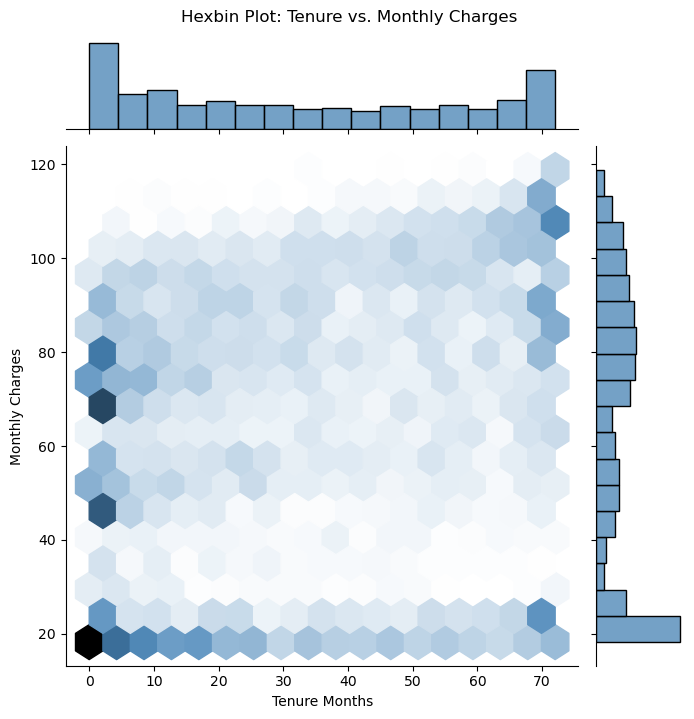

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint hexbin plot for tenure and monthly charges
sns.jointplot(
    x='Tenure Months',
    y='Monthly Charges',
    data=churn,
    kind='hex',
    height=7,
    color='steelblue'
)

plt.suptitle('Hexbin Plot: Tenure vs. Monthly Charges', y=1.02)
plt.show()